# <center> Module 4

Group: 12<br>
Darko Petrov<br>
Alexander Lendon

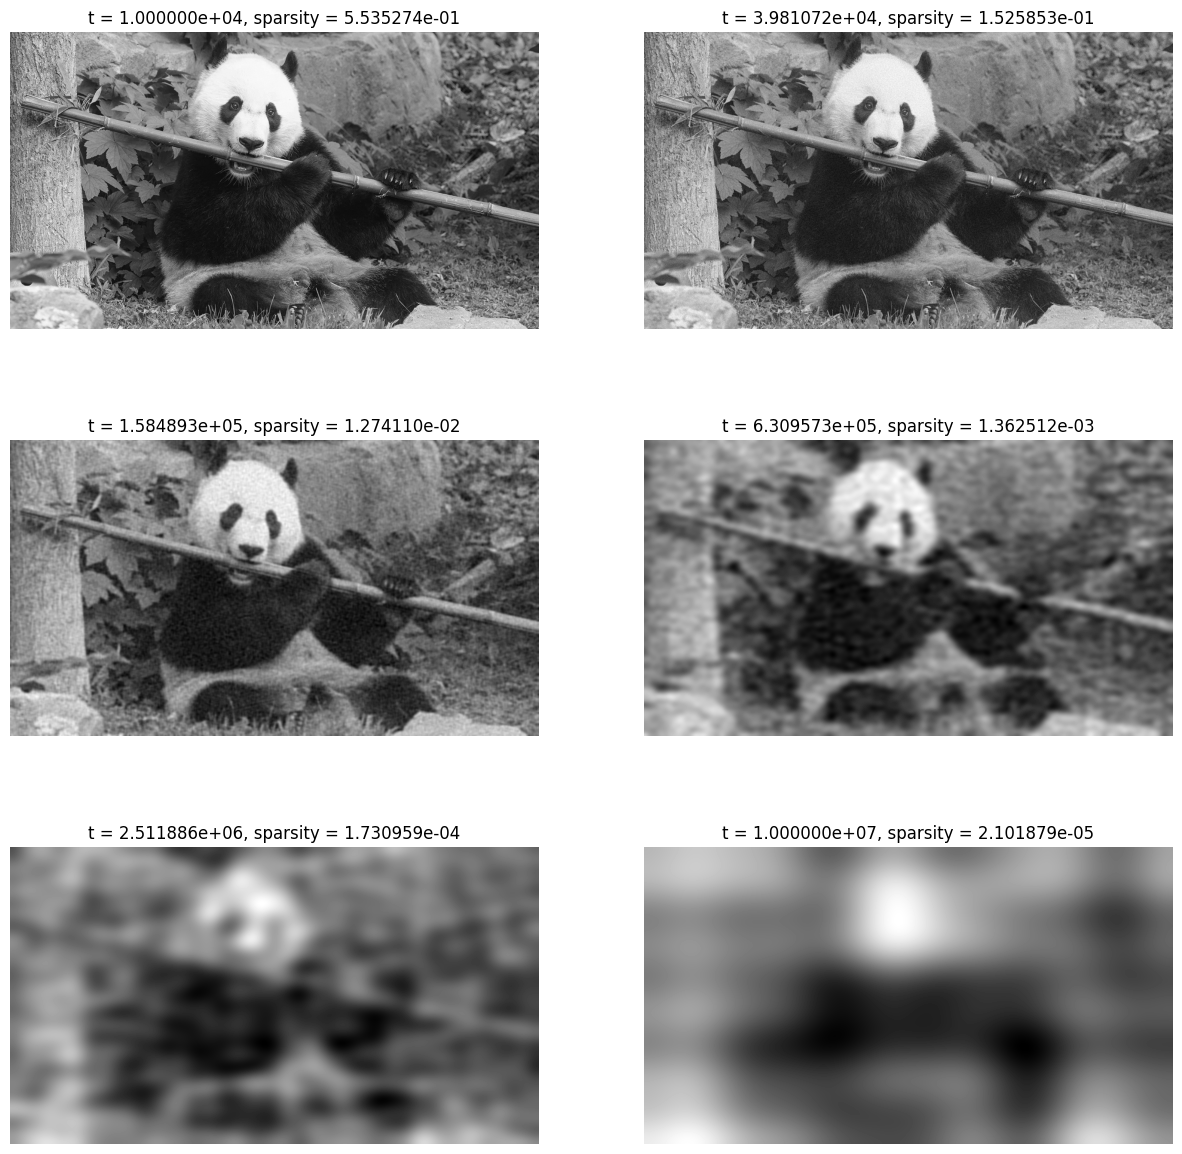

In [13]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as transform

img = iio.imread("panda.png")
# generating grayscale image:
bw_img=np.sum(img,2)/3

# 2D DCT transform 
coeffs= transform.dct(transform.dct(bw_img, axis=0),axis=1)
# Set a threshold t and threshold the coefficients in coeffs which will generate
num_of_t_dev_2 = 3
t = np.logspace(np.log10(1e4), np.log10(1e7), num=num_of_t_dev_2*2)

fig, axs = plt.subplots(num_of_t_dev_2, 2, figsize=(15, 5*num_of_t_dev_2))
for i in range(num_of_t_dev_2):
    for j in range(2):
        # Apply threshold
        approx_coeffs=coeffs*(abs(coeffs)>t[i*2+j])

        # Calculate sparsity
        sparsity = np.count_nonzero(approx_coeffs) / approx_coeffs.size
        
        
        # Apply 2d idct
        approx_img=transform.idct(transform.idct(approx_coeffs, axis=1),axis=0)
        #
        axs[i, j].imshow(approx_img, cmap='gray')
        axs[i, j].set_title(f"t = {t[i*2+j].__format__('e')}, sparsity = {sparsity.__format__('e')}")
        axs[i, j].axis('off')
        
plt.show()


### 2

# Q1.2 a)

Consider a dataset ${(x_i, y_i)}^n_{i=1}$ and remember the linear regression problem with the least squares, i.e. minimizing

$$
LS(\theta) = \frac{1}{2n}\sum_{i=1}^{n} (y_i - \theta^T x_i)^2 = \frac{1}{2n}\left\|y - X^T\theta\right\|_2^2
$$

where $y$ is the vector of $y_i$ and each column of $X$ is a sample $x_i$. Here, we would like to select a sparse model $\theta$ and for this, we add a regularization term of the form $\lambda||\theta||_1 = \lambda||\theta_1|| + \lambda||\theta_2|| + . . . + \lambda||\theta_n||:$

$$ 
\min_{\theta \in \R^m} LS(\theta) + \lambda||\theta||_1
$$
This is called LASSO.


Observe that in Q1.1.b of assignment 3, we actually calculate the proximal operator of the absolute function f(x) = |x|, which is called shrinkage or soft thresholding operator:

$$
S_\lambda(x) = \begin{cases} x-\lambda &  x \geq \lambda \\  x+\lambda &  x \leq -\lambda \\ 0 & x \in(-\lambda, \lambda) \end{cases}
$$

Using this result, calculate the proximal operator of the $\ell_1$ norm $\lambda||\theta||_1$







a) 

The proximal operator of the $\ell_1$ norm, denoted as $\lambda||\theta||_1$, involves applying the soft thresholding operator to each component of the vector $\theta$. The soft thresholding operator is defined as:

$$
S_\lambda(x) = \text{sign}(x) \cdot \max(0, |x| - \lambda)
$$

Now, let's apply this to each component of the vector $\theta$. The proximal operator for the $\ell_1$ norm is given by:

$$
\text{prox}_{\lambda||\cdot||_1}(\theta)_i = \text{sign}(\theta_i) \cdot \max(0, |\theta_i| - \lambda)
$$

In vector form:

$$
\text{prox}_{\lambda||\cdot||_1}(\theta) = \text{sign}(\theta) \cdot \max(0, |\theta| - \lambda)
$$

So, for each component of the vector $\theta$, you compute the sign of the component multiplied by the maximum of 0 and the absolute value of the component minus the threshold $\lambda$.

# Q1.2 b)

Write down a single iteration of the proximal-gradient method by calculating the gradient of LS(θ) and taking the proximal operator of $\lambda||x||_1$. This algorithm is called iterative soft thresholding (ISTA).





b) 

The proximal-gradient method, also known as iterative soft thresholding algorithm (ISTA), is an iterative optimization algorithm used to solve problems with $\ell_1$ regularization. The update rule for a single iteration is as follows:

1. Compute the gradient of the least squares loss:

   $$\nabla LS(\theta) = -\frac{1}{n}X(y - X^T\theta)$$

2. Update the parameter using the proximal operator of the $\ell_1$ norm:

   $$\theta^{(k+1)} = \text{prox}_{\lambda\|\cdot\|_1}\left(\theta^{(k)} - \eta \nabla LS(\theta^{(k)})\right)$$

   Here, $\eta$ is the step size or learning rate.

Putting it all together, a single iteration of ISTA looks like:

$$
\theta^{(k+1)} = \text{prox}_{\lambda\|\cdot\|_1}\left(\theta^{(k)} + \frac{\eta}{n}X^T(y - X^T\theta^{(k)})\right)
$$

This iteration is repeated until convergence, where the proximal operator is applied component-wise to the current estimate of the parameter vector. The proximal operator for the $\ell_1$ norm is the soft thresholding operator, as discussed in the previous response:

$$
\text{prox}_{\lambda\|\cdot\|_1}(\theta)_i = \text{sign}(\theta_i) \cdot \max(0, |\theta_i| - \lambda)
$$

# Q1.2 c)

Now, we consider the cyclic coordinate descent algorithm. We fix all variables $\theta_j$ of LASSO except $\theta_k$ for a particular $k$ and minimize the
objective. For this, we note that we may write LASSO as

$$
\min_{\theta_1, \theta_2, \ldots, \theta_m} \frac{1}{2n} \left\| y -  \sum_{k=1}^{m} \xi_k \theta_k \right\|_2^2 + \lambda \sum_{k=1}^{m} |\theta_k|
$$

where $\xi_k$ is the vector of the $k^{th}$ feature of all samples. Show that minimizing only $\theta_k$ will lead to

$$
\theta_k = \frac{ S_{\lambda} \left( \frac{e^T_k\xi_k}{n} \right)}{\frac{||\xi_k||^2_k}{n}}
$$

where

$$
e_k = y - \sum_{j \neq k} \xi_j \theta_j
$$

CCD is obtained by cycling over all variables $\theta_k$. 

c)

To minimize the objective function with respect to $\theta_k$, let's consider the partial derivative of the objective function with respect to $\theta_k$ and set it to zero. The objective function can be written as:

$$
\min_{\theta_1, \theta_2, \ldots, \theta_m} \frac{1}{2n} \left\| y - \sum_{k=1}^{m} \xi_k \theta_k \right\|_2^2 + \lambda \sum_{k=1}^{m} |\theta_k|
$$

Let's denote the residual vector as $e_y = y - \sum_{j \neq k} \xi_j \theta_j$. The objective function can then be written as:

$$
\min_{\theta_k} \frac{1}{2n} \|e_y - \xi_k \theta_k\|_2^2 + \lambda |\theta_k|
$$

Now, we take the derivative of this with respect to $\theta_k$ and set it to zero:

$$
\begin{align*}
\frac{\partial}{\partial \theta_k} \left( \frac{1}{2n} \|e_y - \xi_k \theta_k\|_2^2 + \lambda |\theta_k| \right) &= -\frac{1}{n} \xi_k^T(e_y - \xi_k \theta_k) + \lambda \text{sign}(\theta_k) \\
&= -\frac{1}{n} \xi_k^T(y - \sum_{j \neq k} \xi_j \theta_j - \xi_k \theta_k) + \lambda \text{sign}(\theta_k) \\
&= -\frac{1}{n} \xi_k^T(e_y) + \frac{\xi_k^T \xi_k}{n} \theta_k + \lambda \text{sign}(\theta_k)
\end{align*}
$$

Setting this to zero and solving for $\theta_k$:

$$
\frac{\xi_k^T e_y}{n} + \frac{\xi_k^T \xi_k}{n} \theta_k + \lambda \text{sign}(\theta_k) = 0
$$

Multiplying through by \(n\):

$$
\xi_k^T e_y + \xi_k^T \xi_k \theta_k + n \lambda \text{sign}(\theta_k) = 0
$$

Rearranging terms:

$$
\xi_k^T e_y = -\xi_k^T \xi_k \theta_k - n \lambda \text{sign}(\theta_k)
$$

Now, isolating $\theta_k$:

$$
\theta_k = -\frac{\xi_k^T e_y}{\xi_k^T \xi_k} - \frac{n \lambda \text{sign}(\theta_k)}{\xi_k^T \xi_k}
$$

Now, using the definition of the soft-thresholding operator $S_{\lambda}(x)$:

$$
\theta_k = S_{\frac{n \lambda}{\|\xi_k\|_2^2}}\left(\frac{\xi_k^T e_y}{\|\xi_k\|_2^2}\right)
$$

Finally, substituting the expression for $e_y$:

$$
\theta_k = \frac{S_{\lambda} \left( \frac{\xi_k^T(y - \sum_{j \neq k} \xi_j \theta_j)}{\|\xi_k\|_2^2} \right)}{\frac{\|\xi_k\|_2^2}{n}}
$$

This is the expression for $\theta_k$ when minimizing with respect to $\theta_k$ in the cyclic coordinate descent algorithm for LASSO.




# V.2.0

Let's consider the objective function for LASSO in terms of the variable $\theta_k$:

$$
\min_{\theta_k} \frac{1}{2n} \left\| y - \sum_{j=1}^{m} \xi_j \theta_j \right\|_2^2 + \lambda \sum_{j=1}^{m} |\theta_j|
$$

For simplicity, let's denote $e_y$ as:

$$
e_y = y - \sum_{j \neq k} \xi_j \theta_j
$$

Now, the objective function becomes:

$$
\min_{\theta_k} \frac{1}{2n} \left\| e_y - \xi_k \theta_k \right\|_2^2 + \lambda |\theta_k|
$$

To find the minimum, we take the derivative of this expression with respect to $\theta_k$ and set it equal to zero. Let's denote the above expression as $F(\theta_k)$:

$$
F(\theta_k) = \frac{1}{2n} \left\| e_y - \xi_k \theta_k \right\|_2^2 + \lambda |\theta_k|
$$

Taking the derivative and setting it equal to zero:

$$
0 = -\frac{1}{n}\xi_k^T(e_y - \xi_k \theta_k) + \lambda \text{sign}(\theta_k)
$$

Now, solving for $\theta_k$:

$$
\frac{1}{n}\xi_k^Te_y = \frac{1}{n}\xi_k^T\xi_k\theta_k + \lambda \text{sign}(\theta_k)
$$

$$
\frac{1}{n}\xi_k^Te_y = \frac{1}{n}\xi_k^T\xi_k\theta_k + \lambda \cdot \begin{cases} 1 & \text{if } \theta_k > 0 \\ -1 & \text{if } \theta_k < 0 \\ [0,1] & \text{if } \theta_k = 0 \end{cases}
$$

Now, rearrange and simplify:

$$
\theta_k = \frac{1}{\frac{1}{n}\xi_k^T\xi_k}S_\lambda\left(\frac{1}{n}\xi_k^Te_y\right)
$$

Finally, substitute the expression for $e_y$:

$$
\theta_k = \frac{1}{\frac{1}{n}\xi_k^T\xi_k}S_\lambda\left(\frac{1}{n}\xi_k^T(y - \sum_{j \neq k} \xi_j \theta_j)\right)
$$

This gives us the desired expression for $\theta_k$ in terms of the soft thresholding operator.

# Q1.2 d)

A third technique for solving LASSO is by ADMM. Here, we write the objective of LASSO as $LS(\theta_1) + \lambda||\theta_2||_1$ with a constraint that $\theta_1 = \theta_2$. Write the augment Lagrangian form for this optimization and show that the iteration of the ADMM technique is given by:

$$
\theta_1^{(t+1)} = \left[ \frac{XX^T}{n} + \rho I \right]^{-1} \left[ \rho \theta_2^{(t)} - \mu^{(t)} + \frac{X^Ty}{n} \right]
$$

$$
\theta_2^{(t+1)} = S_{\frac{\lambda}{\rho}} \left( \theta_1^{(t)} + \frac{\mu^{(t)}}{\rho} \right)
$$

$$
\mu^{(t+1)} = \mu^{(t)} + \rho (\theta_1^{(t+1)} - \theta_2^{(t+1)})
$$



The augmented Lagrangian for the LASSO problem with the constraint $\theta_1 = \theta_2$ is given by:

$$
L_\rho(\theta_1, \theta_2, \mu) = \frac{1}{2n}\left\|y - X^T \theta_1\right\|_2^2 + \lambda \|\theta_2\|_1 + \mu^T(\theta_1 - \theta_2) + \frac{\rho}{2}\left\|\theta_1 - \theta_2\right\|_2^2
$$

The ADMM iteration for this problem involves updating $\theta_1$, $\theta_2$, and $\mu$ alternately. The updates are as follows:

1. Update $\theta_1^{(t+1)}$:

$$
\theta_1^{(t+1)} = \left[\frac{XX^T}{n} + \rho I\right]^{-1}\left[\rho \theta_2^{(t)} - \mu^{(t)} + \frac{X^Ty}{n}\right]
$$

This update is obtained by minimizing the augmented Lagrangian with respect to $\theta_1$.

2. Update $\theta_2^{(t+1)}$:

$$
\theta_2^{(t+1)} = S_{\frac{\lambda}{\rho}}\left(\theta_1^{(t+1)} + \frac{\mu^{(t)}}{\rho}\right)
$$

This update involves applying the soft thresholding operator to the sum of the updated $\theta_1^{(t+1)}$ and the scaled Lagrange multiplier $\mu^{(t)}/\rho$.

3. Update $\mu^{(t+1)}$:

$$
\mu^{(t+1)} = \mu^{(t)} + \rho (\theta_1^{(t+1)} - \theta_2^{(t+1)})
$$

This update is a scaled gradient ascent on the constraint, enforcing $\theta_1 = \theta_2$.

These three updates are repeated iteratively until convergence. The parameter $\rho$ is a positive penalty parameter that can be adjusted based on the algorithm's performance. This algorithm combines the advantages of proximal gradient methods with the benefits of splitting variables into different parts, making it suitable for solving LASSO-type problems.

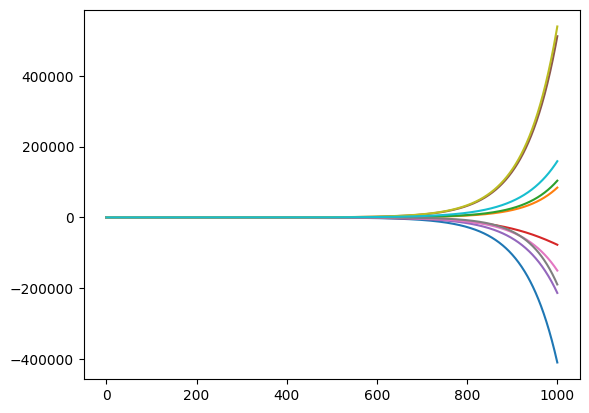

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
np.random.seed(0)

def soft_threshold_ISTA(xx, lambda_):
    x = np.linalg.norm(xx)
    if x >= lambda_:
        return xx-lambda_
    elif x <= -lambda_:
        return xx+lambda_
    else:
        return np.zeros(xx.shape)

def LASSO_ISTA(x, y, step_size=0.1, max_iter=1000, tol=1e-4):
    theta = []
    theta.append(np.random.normal(size=(x.shape[1])))
    for i in range(max_iter):
        if i > 0:
            if np.linalg.norm(theta[-1] - theta[-2]) < tol:
                print(f"Converged after {i} iterations:")
                break
    
        grad = np.dot(x.T, (y - np.dot(x, theta[-1])))/len(x)
        theta_hat = theta[-1] - step_size*grad
        # for t in theta_hat:
        #     t = soft_threshold_ISTA(t, 0)
        
        # theta_hat = theta[-1] + np.array(theta_hat)
        # theta.append(np.array(theta_hat))
        theta.append(theta_hat)
    
    return theta


# def soft_thresholding_CCD(x, lambda_):
#     """Soft thresholding operator."""
#     # return np.sign(x) * np.maximum(0, np.abs(x) - lambda_)
#     return np.sign(x) * max(0, np.abs(x) - lambda_)
#     if x > lambda_:
#         return 1
#     elif x < -lambda_:
#         return -1
#     else:
#         return np.random.choice([-1, 1])

# def LASSO_CCD(x, y, step_size=0.1, max_iter=1000, tol=1e-4):
#     theta = []
#     theta.append(np.random.normal(size=(x.shape[1])))
#     for i in range(max_iter):
#         if i > 0:
#             if np.linalg.norm(theta[-1] - theta[-2]) < tol:
#                 print(f"Converged after {i} iterations:")
#                 break
        
#         theta_hat = []
#         for k in range(x.shape[1]):
#             xik = x[:, k]
#             ek = y-np.sum(np.dot(xik, theta[-1][k]), where=k!=i)
#             soft = np.dot(ek.T, xik)/len(x)
#             theta_k = soft_thresholding_CCD(soft, step_size)/((np.linalg.norm(xik)**2)/len(x))
#             theta_hat.append(theta_k)
#         theta_hat = theta[-1] + np.array(theta_hat)
#         theta.append(theta_hat)

#     return theta

# def LASSO_ADMM(x, y, step_size=0.1, max_iter=1000, tol=1e-4):
#     theta = 0
    
#     return theta




n = 100
d = 10
x = np.random.normal(size=(n, d), loc=0, scale=1)
y = np.random.normal(size=(n), loc=0, scale=1 )

step_size = 0.01
max_iter = 1000
tol = 1e-4

# x = load_diabetes().data
# y = load_diabetes().target

# for i in range(x.shape[1]):
#     x[:,i] = (x[:,i] - np.mean(x[:,i], axis=0)) / np.std(x[:,i], axis=0)
# print(mean(x))
# print(mean(y))
# print(np.std(x))
# print(np.std(y))



theta_ista = LASSO_ISTA(x, y, step_size, max_iter, tol)
# theta_ccd = LASSO_CCD(x, y, step_size, max_iter, tol)
# theta_admm = LASSO_ADMM(x, y, step_size, max_iter, tol)

# print(theta_ista[-1])
theta_ista = np.array(theta_ista)
plt.plot(theta_ista)
plt.show()

# theta_ccd = np.array(theta_ccd)
# print(theta_ccd.shape)
# print(theta_ccd[-1])
# for dim in range(theta_ccd.shape[1]):
#     plt.plot(theta_ccd[:,dim])
#     plt.show()
# plt.plot(theta_ccd)
# plt.show()